In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report
from sklearn.metrics import confusion_matrix
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

**Goal:** is to detect fraudulent credit card transactions from a highly imbalanced dataset. Fraud cases are rare, so special handling of class imbalance and careful evaluation metrics are required.

In [2]:
df = pd.read_csv("Data/creditcard.csv")

### Step 1: Exploratory Data Analysis (EDA)

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Time colimn: is in seconds <br>
Class column: if 1 means there is a fraud if 0 no fraud 

#### Check dataset shape and column information:

In [5]:
df.shape

(284807, 31)

In [6]:
df.duplicated().sum()

np.int64(1081)

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

#### Statistical summary:

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


Outliers checking

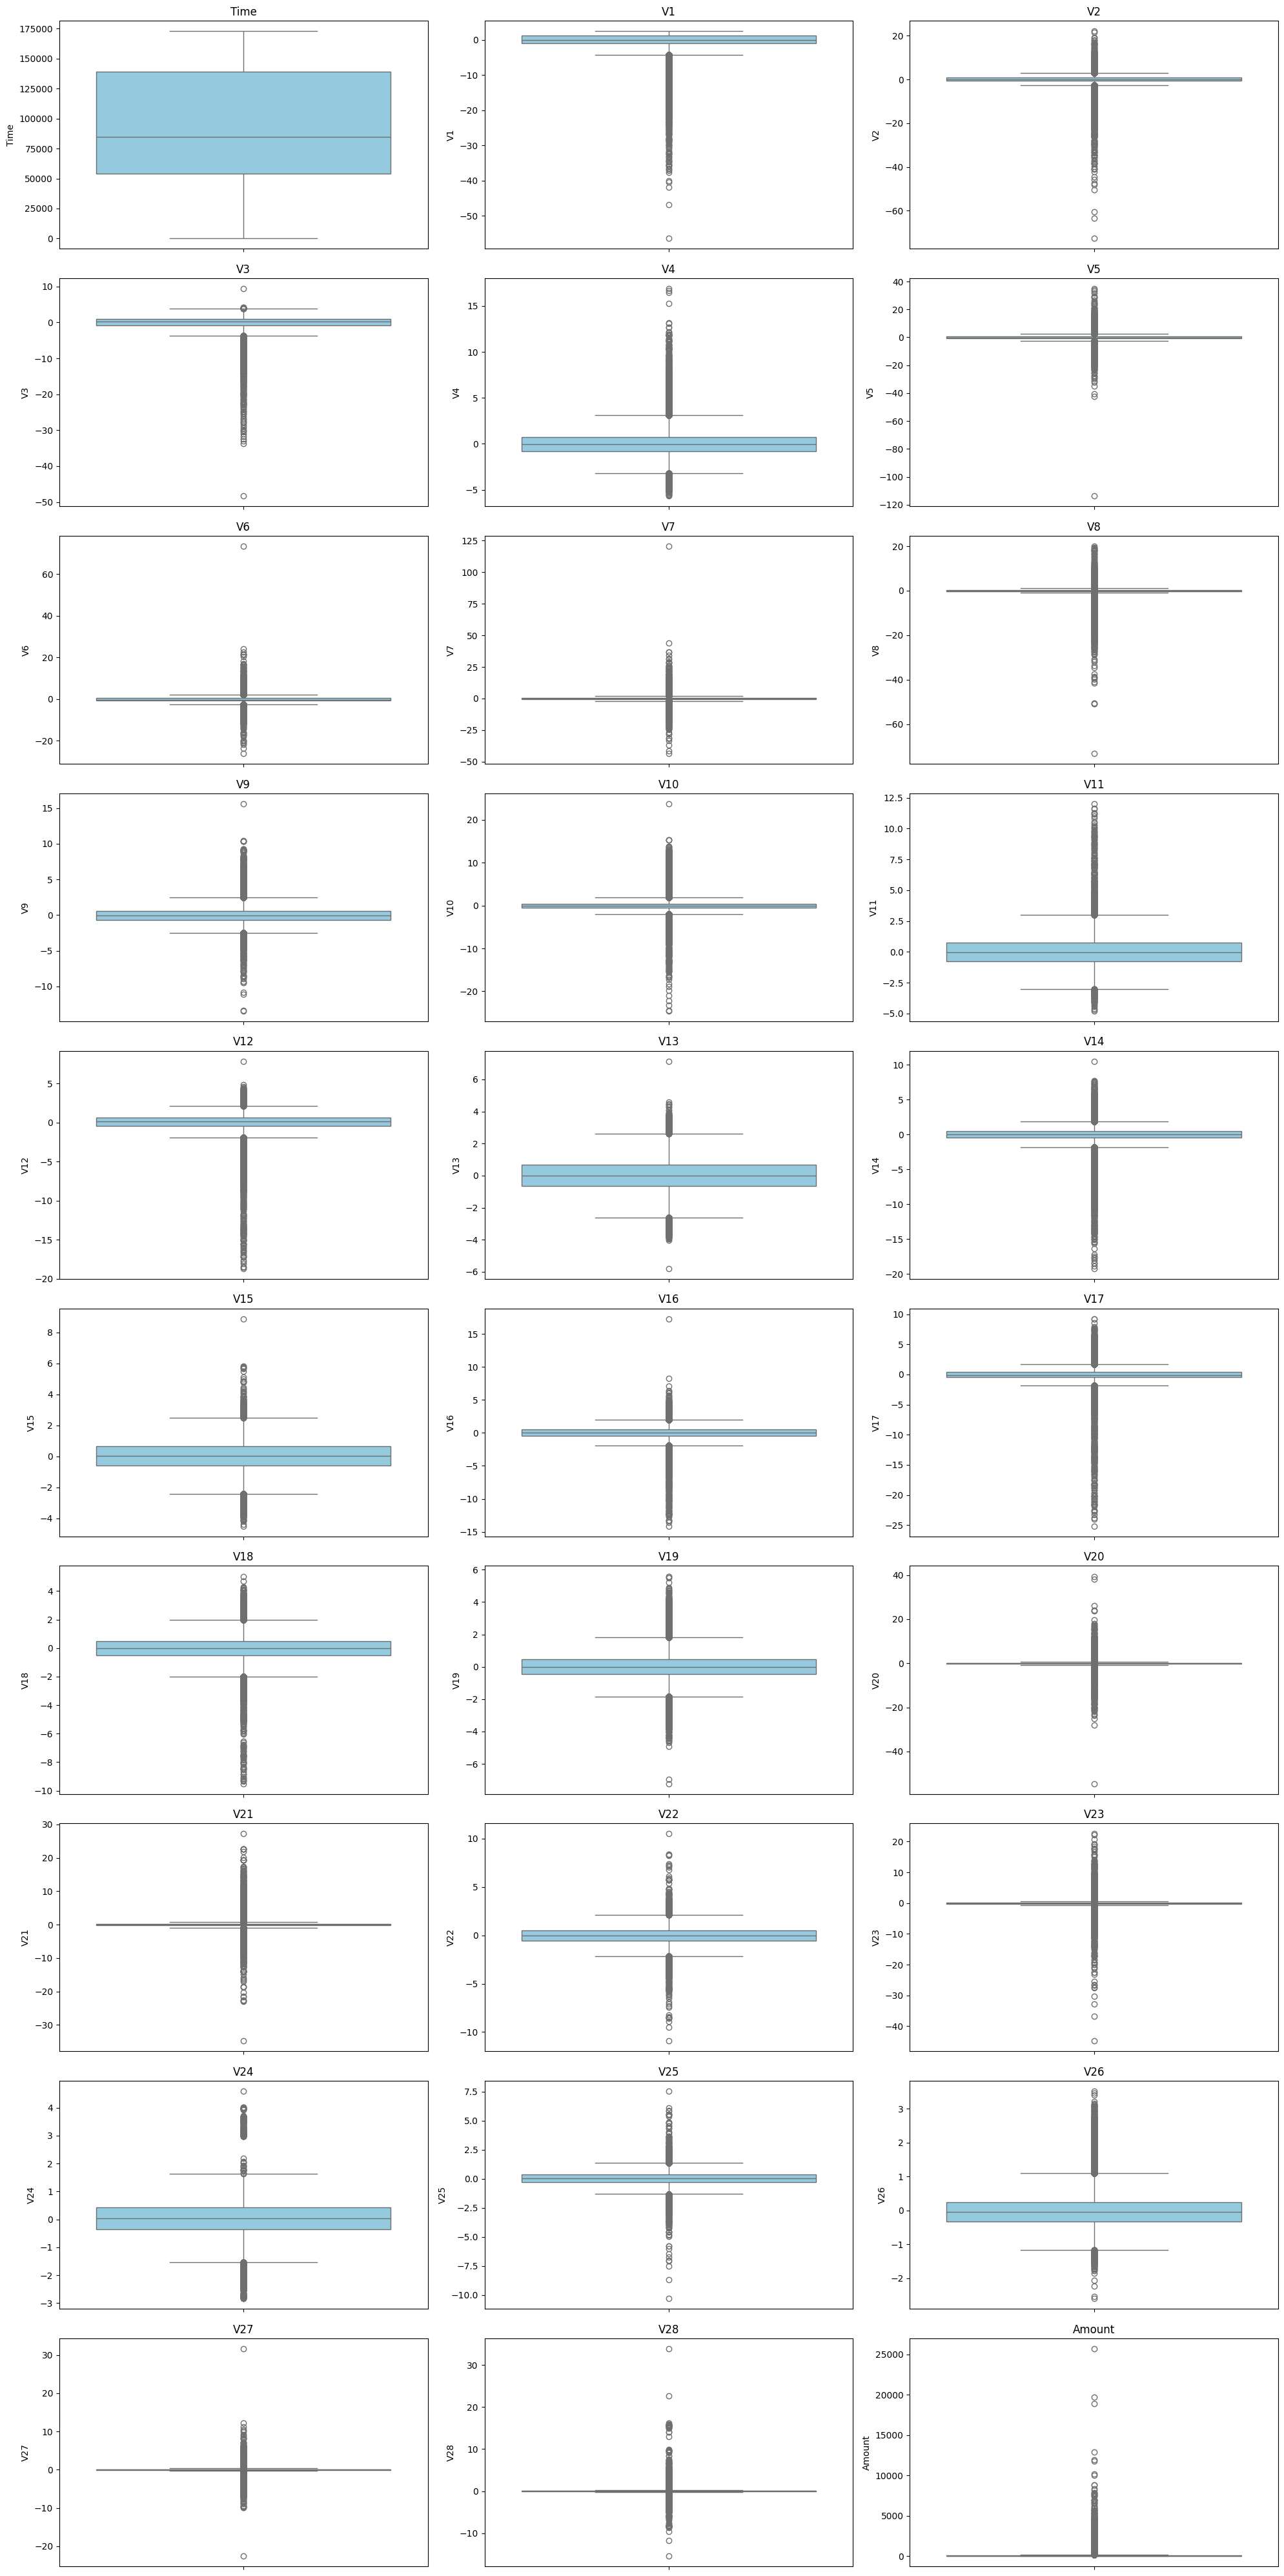

In [12]:
numeric_cols = df.drop(columns=['Class']).columns

plt.figure(figsize=(20, 40))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(10, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

#### Class imbalance check:

Class distribution:
        count  percent
Class                 
0      283253    99.83
1         473     0.17


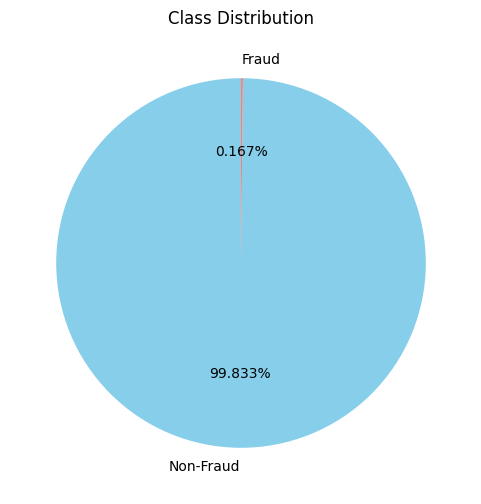

In [13]:
cls_counts = df["Class"].value_counts().sort_index()
cls_pct = (cls_counts / len(df) * 100).round(2)

print("Class distribution:")
print(pd.DataFrame({"count": cls_counts, "percent": cls_pct}))
plt.figure(figsize=(6,6))
plt.pie(cls_counts, labels=["Non-Fraud", "Fraud"], 
        autopct="%1.3f%%", colors=["skyblue", "salmon"], startangle=90)
plt.title("Class Distribution")
plt.show()


#### Correlation and feature analysis

Compute correlations between features

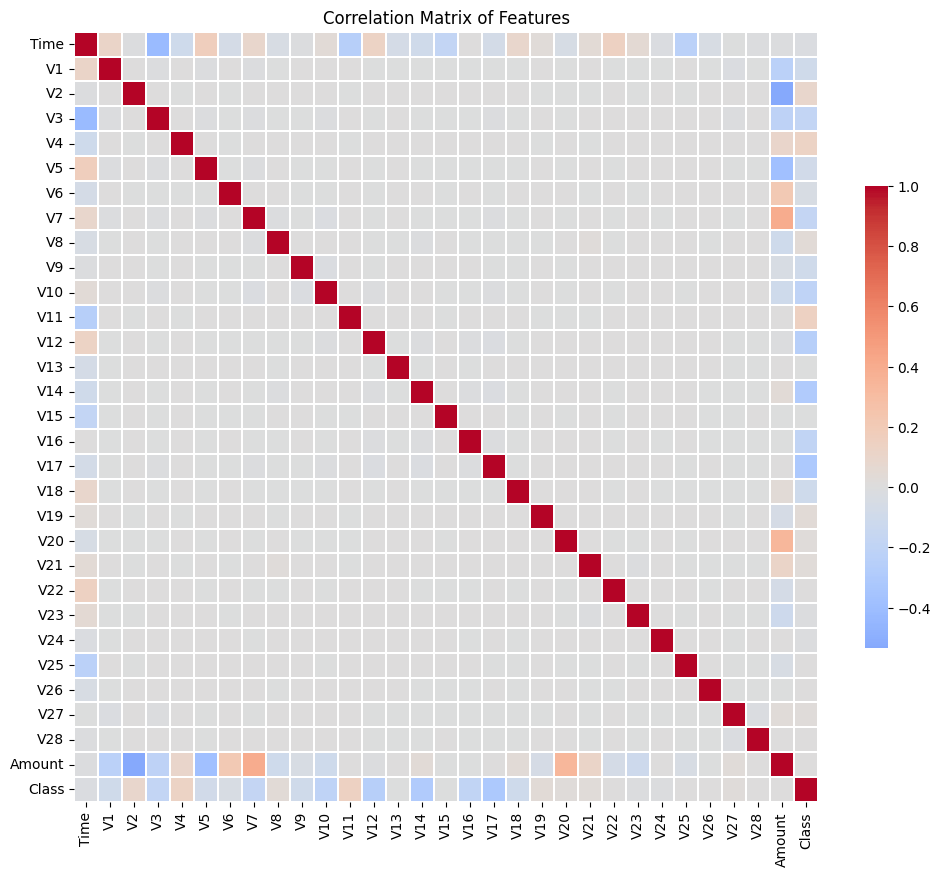

In [14]:
corr = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", center=0, 
            cbar_kws={"shrink": .6}, linewidths=0.2)
plt.title("Correlation Matrix of Features")
plt.show()
plt.show()

Visualize distributions of key features (e.g., transaction amount) for fraud vs. non-fraud.


Features selected for visualization: ['V17', 'V14', 'V12', 'V10', 'V16']


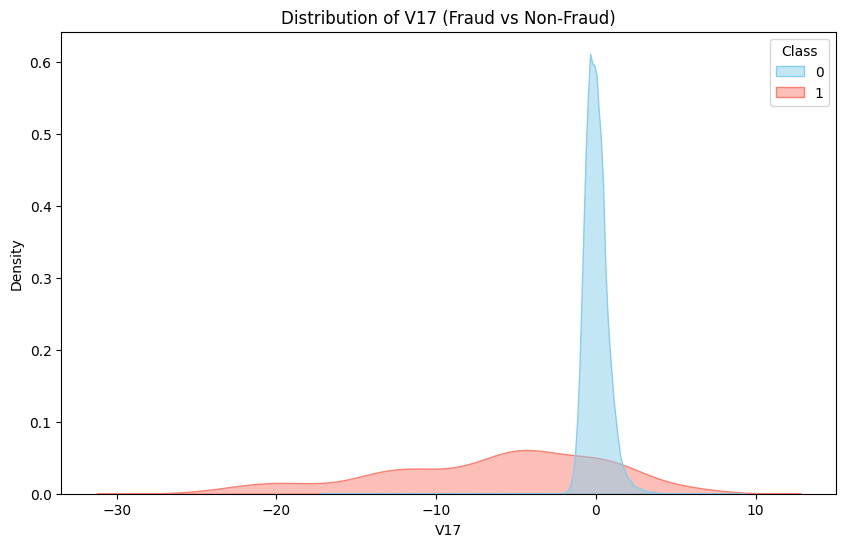

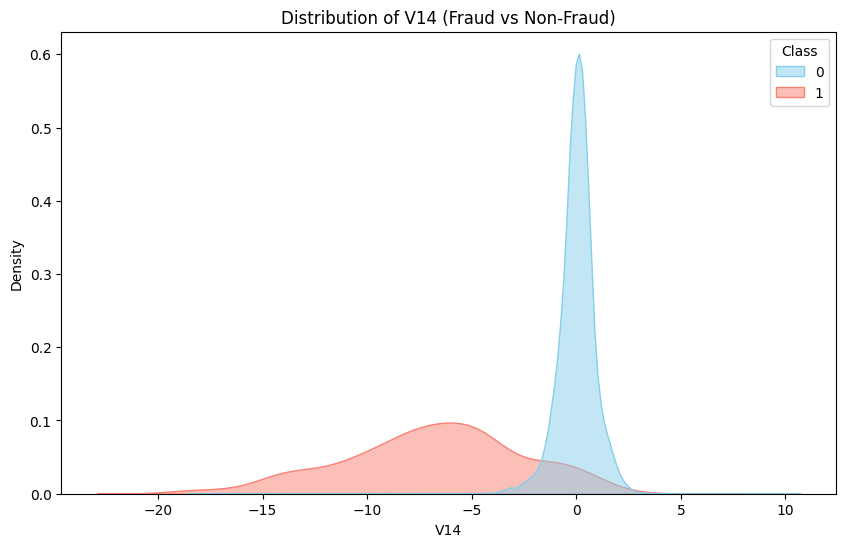

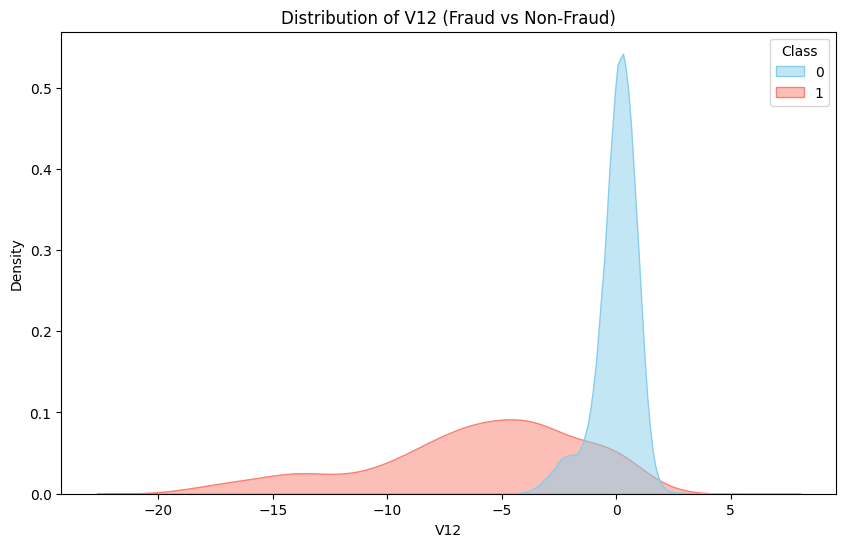

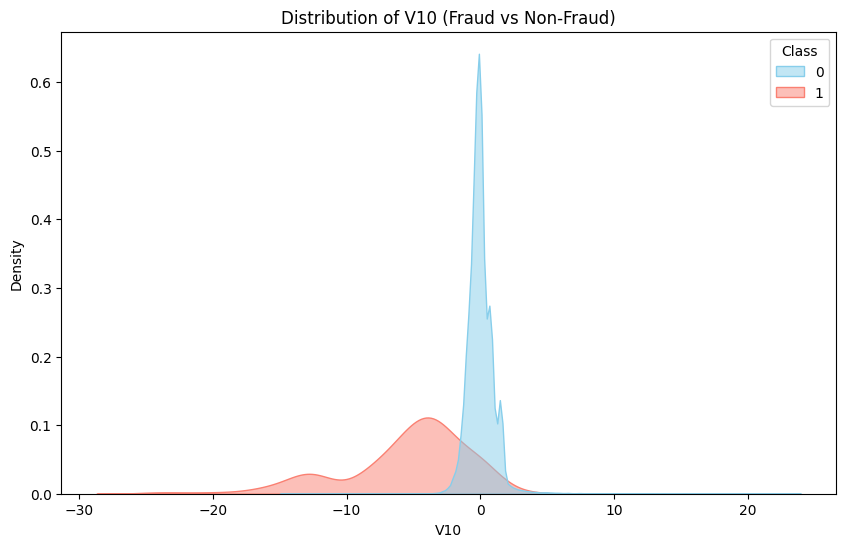

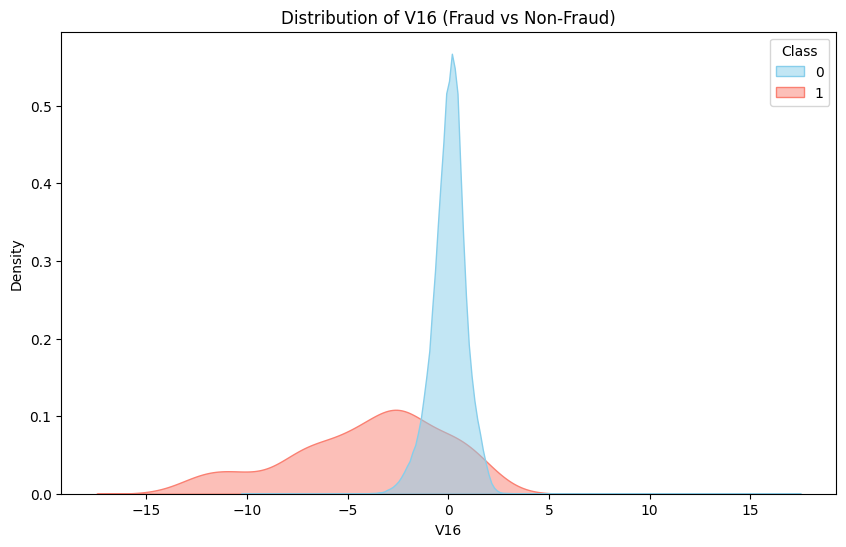

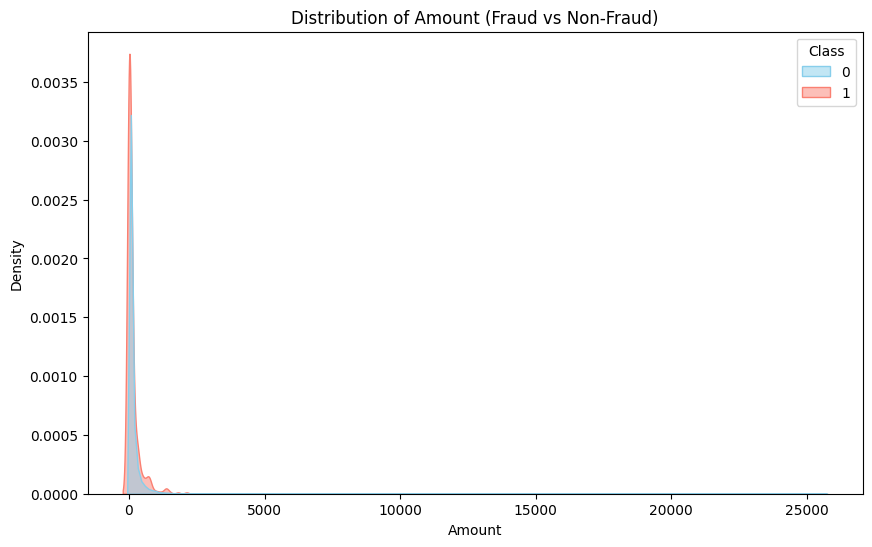

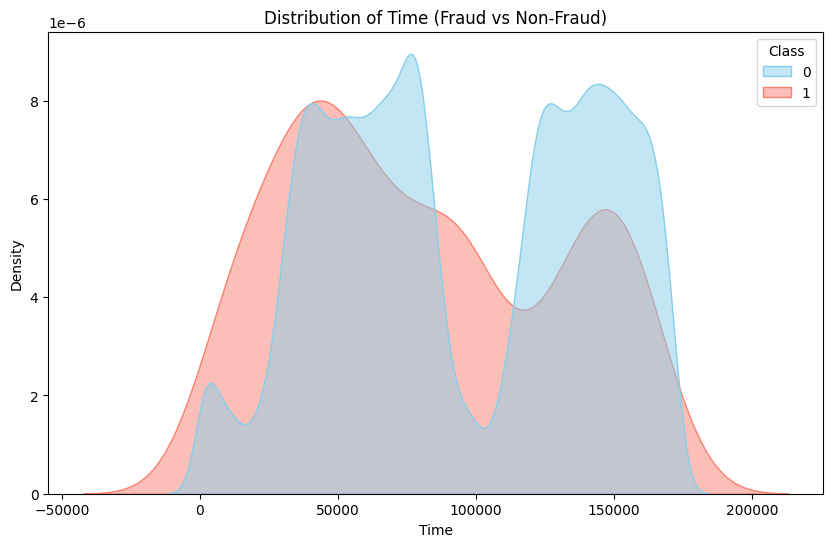

In [15]:
corr_with_class = df.corr()['Class'].drop('Class').sort_values(key=abs, ascending=False)
top_features = corr_with_class.head(5).index.tolist()
print("\nFeatures selected for visualization:", top_features)
for col in top_features + ['Amount', 'Time']:
    plt.figure(figsize=(10,6))
    sns.kdeplot(data=df, x=col, hue="Class",
                fill=True, common_norm=False,
                palette=["skyblue","salmon"], alpha=0.5)
    plt.title(f"Distribution of {col} (Fraud vs Non-Fraud)")
    plt.show()

### Step 2: Data Preprocessing:

Split data

In [16]:
X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Scale

In [17]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

### Step 3: Baseline Models:

1. Model Training

In [18]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel="linear", random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(
        eval_metric="mlogloss",
        tree_method="hist",
        use_label_encoder=False,
        random_state=42
    )
}

In [19]:
trained_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model

Training Logistic Regression...


c:\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training SVM...
Training Decision Tree...
Training Random Forest...
Training XGBoost...


c:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:07:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


2. Predict fraud/non-fraud on the test set

In [20]:
predictions = {}

for name, model in trained_models.items():
    print(f"\nPredicting with {name}...")

    if hasattr(model, "predict_proba"):
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]
    else:  # SVM fallback
        y_pred = model.predict(X_test)
        y_proba = model.decision_function(X_test)

    # Save predictions
    predictions[name] = {
        "y_pred": y_pred,
        "y_proba": y_proba
    }


Predicting with Logistic Regression...

Predicting with SVM...

Predicting with Decision Tree...

Predicting with Random Forest...

Predicting with XGBoost...


3. Record initial performance metrics

In [21]:
results = []

for name, preds in predictions.items():
    y_pred  = preds["y_pred"]
    y_proba = preds["y_proba"]

    # Metrics
    roc_auc = roc_auc_score(y_test, y_proba)
    pr_auc  = average_precision_score(y_test, y_proba)

    print(f"\n{name}")
    print("ROC-AUC:", round(roc_auc, 4))
    print("PR-AUC:", round(pr_auc, 4))
    print(classification_report(y_test, y_pred, digits=4))

    results.append([name, roc_auc, pr_auc])

# Summary table
results_df = pd.DataFrame(results, columns=["Model", "ROC-AUC", "PR-AUC"])
print("\nSummary of Baseline Results:\n", results_df)


Logistic Regression
ROC-AUC: 0.9334
PR-AUC: 0.6481
              precision    recall  f1-score   support

           0     0.9993    0.9999    0.9996     56651
           1     0.8769    0.6000    0.7125        95

    accuracy                         0.9992     56746
   macro avg     0.9381    0.7999    0.8560     56746
weighted avg     0.9991    0.9992    0.9991     56746


SVM
ROC-AUC: 0.7749
PR-AUC: 0.1609
              precision    recall  f1-score   support

           0     0.9986    0.9999    0.9993     56651
           1     0.6923    0.1895    0.2975        95

    accuracy                         0.9985     56746
   macro avg     0.8455    0.5947    0.6484     56746
weighted avg     0.9981    0.9985    0.9981     56746


Decision Tree
ROC-AUC: 0.8524
PR-AUC: 0.5086
              precision    recall  f1-score   support

           0     0.9995    0.9995    0.9995     56651
           1     0.7204    0.7053    0.7128        95

    accuracy                         0.9990     

### Step 4: Model Evaluation

1. Confusion Matrix

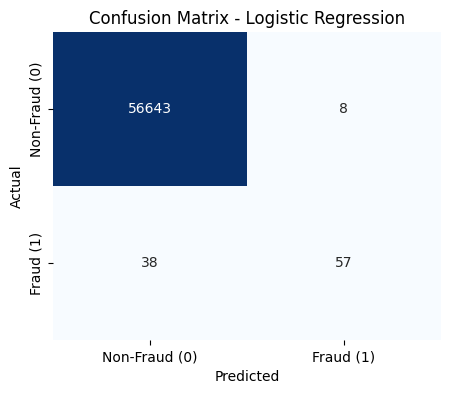


Logistic Regression Confusion Matrix Values:
True Negatives (TN): 56643
False Positives (FP): 8
False Negatives (FN): 38
True Positives (TP): 57


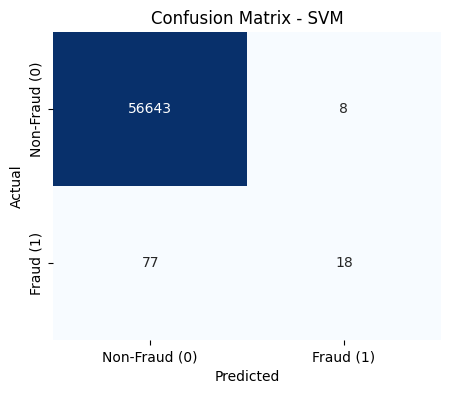


SVM Confusion Matrix Values:
True Negatives (TN): 56643
False Positives (FP): 8
False Negatives (FN): 77
True Positives (TP): 18


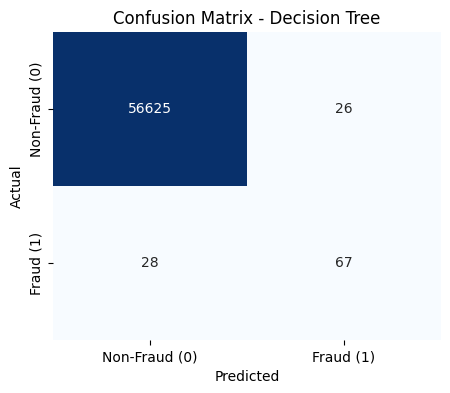


Decision Tree Confusion Matrix Values:
True Negatives (TN): 56625
False Positives (FP): 26
False Negatives (FN): 28
True Positives (TP): 67


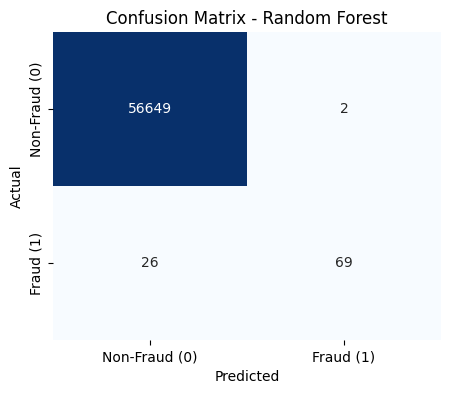


Random Forest Confusion Matrix Values:
True Negatives (TN): 56649
False Positives (FP): 2
False Negatives (FN): 26
True Positives (TP): 69


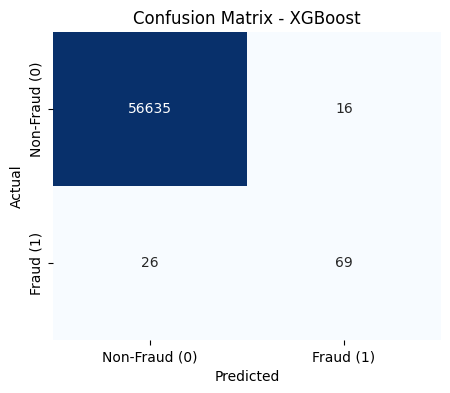


XGBoost Confusion Matrix Values:
True Negatives (TN): 56635
False Positives (FP): 16
False Negatives (FN): 26
True Positives (TP): 69


In [22]:
for name, preds in predictions.items():
    y_pred = preds["y_pred"]

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Non-Fraud (0)", "Fraud (1)"],
                yticklabels=["Non-Fraud (0)", "Fraud (1)"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Print values separately
    tn, fp, fn, tp = cm.ravel()
    print(f"\n{name} Confusion Matrix Values:")
    print(f"True Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")
    print(f"True Positives (TP): {tp}")

In [23]:
results = {}

for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))


results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)
print("\nModel Accuracy Comparison:\n", results_df)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.88      0.60      0.71        95

    accuracy                           1.00     56746
   macro avg       0.94      0.80      0.86     56746
weighted avg       1.00      1.00      1.00     56746


SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.69      0.19      0.30        95

    accuracy                           1.00     56746
   macro avg       0.85      0.59      0.65     56746
weighted avg       1.00      1.00      1.00     56746


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.72      0.71      0.71        95

    accuracy                           1.00     56746
   macro avg      

#### Explain why accuracy is misleading in imbalanced problems.

Accuracy is misleading in imbalanced problems because a model can predict everything as the majority class (non-fraud) and still be 99% correct, while catching no fraud at all. That’s why we use precision, recall, and F1 score to measure performance instead.

#### Emphasize trade-off between precision (avoiding false alarms) and recall (catching frauds).

In fraud detection, there is always a trade-off between precision and recall. High precision means fewer false alarms, but you may miss some fraud cases. High recall means you catch most frauds, but you may flag many normal transactions by mistake. The goal is to find the right balance depending on whether avoiding false alarms or catching every fraud is more important.

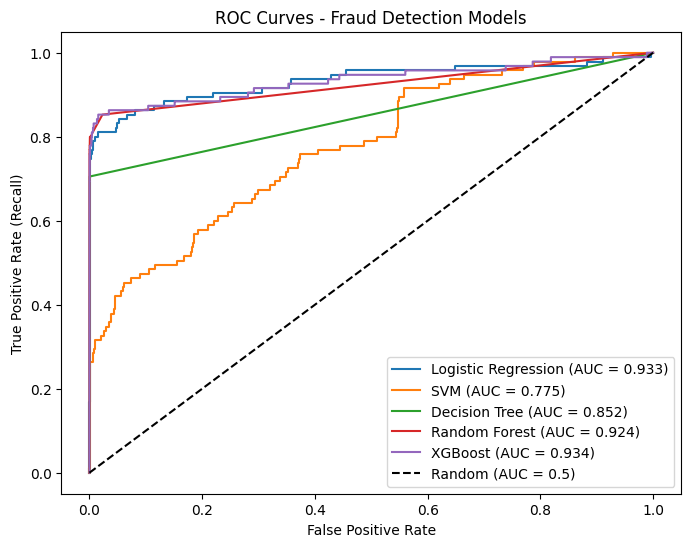

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for name, preds in predictions.items():
    y_proba = preds["y_proba"]

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

# Random guess line
plt.plot([0,1], [0,1], 'k--', label="Random (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curves - Fraud Detection Models")
plt.legend()
plt.show()


#### Resampling techniques (searching required)

In [31]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# ---- helper ----
def n_combos(grid: dict) -> int:
    total = 1
    for vals in grid.values():
        total *= len(vals)
    return total

# ---- CV ----
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# ---- Pipelines:
pipelines = {
    "LogReg": Pipeline([
        ("smote", SMOTE(random_state=42)),
        ("scale", RobustScaler()),
        ("clf", LogisticRegression(max_iter=1000, class_weight="balanced"))
    ]),
    "DecisionTree": Pipeline([
        ("smote", SMOTE(random_state=42)),
        ("clf", DecisionTreeClassifier(random_state=42))
    ]),

    "RandomForest": Pipeline([
        ("clf", RandomForestClassifier(
            n_estimators=200,                
            max_depth=12,                  
            min_samples_leaf=3,             
            max_features="sqrt",            
            bootstrap=True,
            max_samples=0.8,                
            class_weight="balanced_subsample",
            n_jobs=1,                       
            random_state=42
        ))
    ]),
    "XGBoost": Pipeline([
        ("smote", SMOTE(random_state=42)),
        ("clf", XGBClassifier(
            eval_metric="logloss",
            tree_method="hist",
            random_state=42,
            n_jobs=-1
        ))
    ])
}


param_grids = {
    "LogReg": {
        "smote__sampling_strategy": [1.0],
        "clf__C": [0.1, 1, 10],
        "clf__solver": ["lbfgs"]
    },
    "DecisionTree": {
        "smote__sampling_strategy": [1.0],
        "clf__max_depth": [None, 8, 16],
        "clf__min_samples_leaf": [1, 5]
    },

    "RandomForest": {
        "clf__n_estimators": [150, 250],
        "clf__max_depth": [10, 12],
        "clf__min_samples_leaf": [2, 3],
        "clf__max_features": ["sqrt"],

    },
    "XGBoost": {
        "smote__sampling_strategy": [1.0],
        "clf__max_depth": [4, 6],
        "clf__learning_rate": [0.05, 0.1],
        "clf__subsample": [0.8, 1.0]
    }
}

# ---- Summary ----
total_combinations = sum(n_combos(grid) for grid in param_grids.values())
print(f"Total parameter combinations across all models: {total_combinations}")
print(f"Total model fits (with {cv.n_splits}-fold CV): {total_combinations * cv.n_splits}\n")

# ---- Train ----
best_models = {}
for name, pipe in pipelines.items():
    print(f"Training {name} with GridSearchCV...")
    combos = n_combos(param_grids[name])
    print(f"  - Testing {combos} parameter combinations")

    grid = GridSearchCV(
        estimator=pipe,
        param_grid=param_grids[name],
        scoring="average_precision",
        cv=cv,
        n_jobs=2,         
        verbose=1
    )

    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f"  - {name} best CV PR-AUC: {grid.best_score_:.4f}")
    print(f"  - Best params: {grid.best_params_}\n")

print("="*50)
print("TRAINING COMPLETE!")
print("="*50)
for name in best_models:
    print(f"{name}: Ready for evaluation")


Total parameter combinations across all models: 25
Total model fits (with 3-fold CV): 75

Training LogReg with GridSearchCV...
  - Testing 3 parameter combinations
Fitting 3 folds for each of 3 candidates, totalling 9 fits
  - LogReg best CV PR-AUC: 0.7573
  - Best params: {'clf__C': 0.1, 'clf__solver': 'lbfgs', 'smote__sampling_strategy': 1.0}

Training DecisionTree with GridSearchCV...
  - Testing 6 parameter combinations
Fitting 3 folds for each of 6 candidates, totalling 18 fits
  - DecisionTree best CV PR-AUC: 0.4401
  - Best params: {'clf__max_depth': 16, 'clf__min_samples_leaf': 5, 'smote__sampling_strategy': 1.0}

Training RandomForest with GridSearchCV...
  - Testing 8 parameter combinations
Fitting 3 folds for each of 8 candidates, totalling 24 fits


KeyboardInterrupt: 

### Decision Threshold Adjustment


LogReg
  Chosen threshold: 1.000 (GOAL=recall_at_precision)
  Test @0.5  -> P:0.122  R:0.853  F1:0.214  AP:0.685
  Test @thr  -> P:0.869 R:0.768 F1:0.816  AP:0.685

DecisionTree
  Chosen threshold: 0.995 (GOAL=recall_at_precision)
  Test @0.5  -> P:0.271  R:0.747  F1:0.398  AP:0.389
  Test @thr  -> P:0.496 R:0.716 F1:0.586  AP:0.389


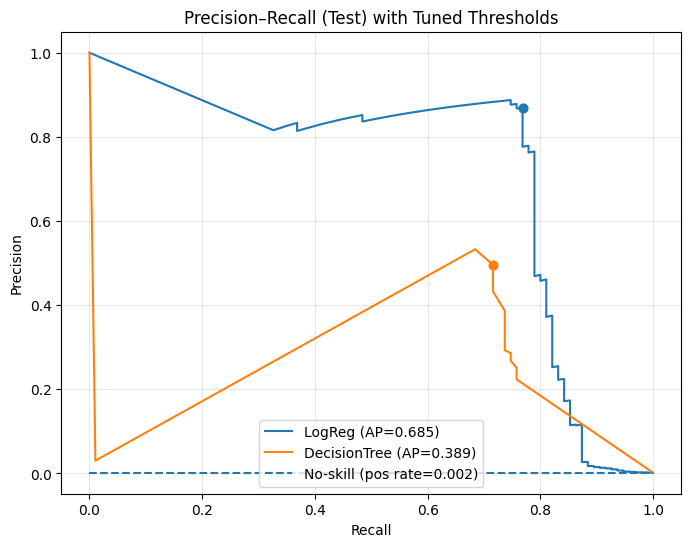

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_recall_curve, average_precision_score,
    precision_score, recall_score, f1_score
)

# 1) Choose your goal (pick ONE)
GOAL = "recall_at_precision"  
MIN_PRECISION = 0.90           
MIN_RECALL    = 0.85           

# 2) Make a simple validation split from your training data
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

def proba(model, X):
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:, 1]
    if hasattr(model, "decision_function"):
        return model.decision_function(X)
    return model.predict(X).astype(float)

best_thresholds = {}

# 3) For each model: quick refit on (X_tr,y_tr) → pick threshold on (X_val,y_val)
for name, model in best_models.items():
    model.fit(X_tr, y_tr)
    val_scores = proba(model, X_val)

    p, r, th = precision_recall_curve(y_val, val_scores)  # note: len(th) = len(p)-1
    if len(th) == 0:
        thr = 0.5
    else:
        if GOAL == "max_f1":
            f1 = (2 * p * r) / np.clip(p + r, 1e-12, None)
            idx = int(np.nanargmax(f1))
            thr = th[max(idx - 1, 0)]
        elif GOAL == "recall_at_precision":
            mask = p[:-1] >= MIN_PRECISION
            thr = th[mask][np.argmax(r[:-1][mask])] if np.any(mask) else th[np.argmax((2*p*r)/(p+r+1e-12)) - 1]
        elif GOAL == "precision_at_recall":
            mask = r[:-1] >= MIN_RECALL
            thr = th[mask][np.argmax(p[:-1][mask])] if np.any(mask) else th[np.argmax((2*p*r)/(p+r+1e-12)) - 1]
        else:
            thr = 0.5

    best_thresholds[name] = float(thr)

    # Evaluate on TEST: baseline 0.5 vs tuned
    test_scores = proba(model, X_test)
    yb = (test_scores >= 0.5).astype(int)
    yt = (test_scores >= thr).astype(int)

    base_P = precision_score(y_test, yb, zero_division=0)
    base_R = recall_score(y_test, yb, zero_division=0)
    base_F1 = f1_score(y_test, yb, zero_division=0)
    tuned_P = precision_score(y_test, yt, zero_division=0)
    tuned_R = recall_score(y_test, yt, zero_division=0)
    tuned_F1 = f1_score(y_test, yt, zero_division=0)
    ap = average_precision_score(y_test, test_scores)

    print(f"\n{name}")
    print(f"  Chosen threshold: {thr:.3f} (GOAL={GOAL})")
    print(f"  Test @0.5  -> P:{base_P:.3f}  R:{base_R:.3f}  F1:{base_F1:.3f}  AP:{ap:.3f}")
    print(f"  Test @thr  -> P:{tuned_P:.3f} R:{tuned_R:.3f} F1:{tuned_F1:.3f}  AP:{ap:.3f}")

# 4) Plot Precision–Recall curves on TEST and mark chosen points
plt.figure(figsize=(8,6))
pos_rate = y_test.mean()

for name, model in best_models.items():
    scores = proba(model, X_test)
    p, r, th = precision_recall_curve(y_test, scores)
    ap = average_precision_score(y_test, scores)
    plt.plot(r, p, label=f"{name} (AP={ap:.3f})")

    # mark chosen threshold
    if len(th) > 0:
        thr = best_thresholds[name]
        idx = int(np.argmin(np.abs(th - thr)))
        plt.scatter(r[idx], p[idx], s=40)

plt.hlines(pos_rate, 0, 1, linestyles="dashed", label=f"No-skill (pos rate={pos_rate:.3f})")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision–Recall (Test) with Tuned Thresholds")
plt.grid(True, alpha=0.3); plt.legend()
plt.show()